# Exercise 3 - Stochastic Gradient Descent

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## 1

We have:

$$R_n(w) = \frac{1}{n} \sum_{i=1}^{n} (y_i - w^Tx_i)^2 = \frac{1}{n} \sum_{i=1}^{n} l(w, z_i)$$

So:
\begin{equation}
\begin{aligned}
\nabla R_n(w) &= \frac{1}{n} \sum_{i=1}^{n} \nabla l(w, z_i) \\
&= \frac{1}{n} \sum_{i=1}^{n} \nabla(y_i - w^Tx_i)^2 \\
&= \frac{1}{n} \sum_{i=1}^{n} 2x_i(w^Tx_i - y_i)  \\
\end{aligned}
\end{equation}

We use the following Stochastic Gradient Descent algorithm to compute $w^*$: 

$\textbf{1}$ - Initialize $w_o$ uniformly in $[-1,1]^d$.

$\textbf{2}$ - Choose $(\epsilon_t)_{t \in \mathbb{{R^*}_{+}}}$ such that $\sum \epsilon_t = +\infty$ and $\sum (\epsilon_t)^2 \leq +\infty$

$\textbf{3}$ - For $k \leq k_{iterations}$ do:

Sample $i$ uniformly in $[1,n]$

Compute $\nabla l(w, z_i) = 2x_i (w^Tx_i - y_i)$

Set $w_{k+1} = w_k - 2x_i \epsilon_k (w^Tx_i - y_i)$

$\textbf{4}$ - Return $w_k$



In [178]:
def stochastic_gradient_descent(X, y, max_iter = int(1e4)):
    list_theta = []
    n, m = X.shape
    #epsilon = 1/(10 * np.sqrt((np.arange(max_iter)+1)))
    epsilon = 0.01 * np.ones(max_iter)
    theta = 2*np.random.rand(m)-1
    for k in range(max_iter):
        i = np.random.randint(n)
        theta = theta - 2 * epsilon[k] * (X[i].dot(theta) - y[i]) * X[i]
        theta /= np.linalg.norm(theta)
        list_theta.append(theta)
    return theta, np.array(list_theta)

## 2

In [185]:
def sample_population(n_samples, theta):
    X = 2 * np.random.rand(n_samples, 2) - 1
    y = np.where(np.dot(X, theta) > 0, 1, -1)
    return X, y

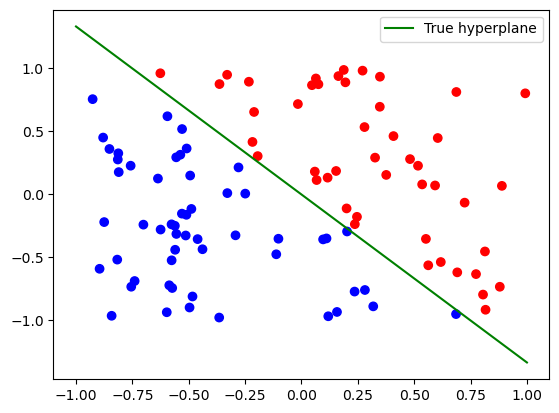

In [186]:
theta = [4,3]
norm_theta = np.linalg.norm(theta)
n_samples = 100

samples = sample_population(n_samples, theta)
colors = np.where(samples[1] == 1, 'red', 'blue')

plt.scatter(samples[0][:, 0], samples[0][:, 1], color=colors)

# Plot the separation hyperplane
x = np.linspace(-1, 1, 100)
y = -(theta[0] * x) / theta[1]  # Assuming `theta` is the parameter vector of the hyperplane
plt.plot(x, y, color='green', label='True hyperplane')
plt.legend()

plt.show()


## 3

The dot product between the true theta and the estimated theta is 0.99712082739309


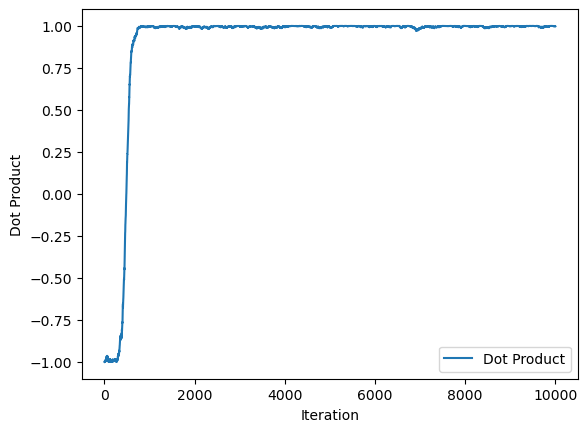

In [187]:
liste_theta_hat = stochastic_gradient_descent(samples[0], samples[1], max_iter = int(1e4))[1]
liste_dot_product = np.dot(liste_theta_hat, theta/norm_theta)
plt.plot(liste_dot_product)
plt.xlabel('Iteration')
plt.ylabel('Dot Product')
plt.legend(['Dot Product'])
print('The dot product between the true theta and the estimated theta is', liste_dot_product[-1])


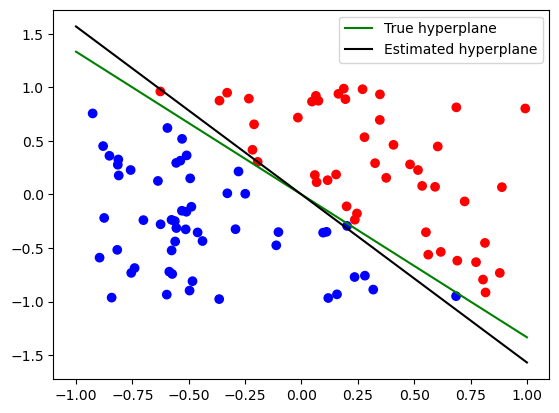

In [188]:
plt.scatter(samples[0][:, 0], samples[0][:, 1], color=colors)

# Plot the separation hyperplane
x = np.linspace(-1, 1, 100)
y = -(theta[0] * x) / theta[1]  # Assuming `theta` is the parameter vector of the hyperplane
z = -(liste_theta_hat[-1][0] * x) / liste_theta_hat[-1][1]
plt.plot(x, y, color='green', label='True hyperplane')
plt.plot(x, z, color='black', label='Estimated hyperplane')
plt.legend()

plt.show()

The dot product is really close to $1$; $w^*$ and $\overline{w}$ are close. 

On the plot, we can see that a very few number of samples are classified in the wrong class.

## 4

In [193]:
def add_noise(X, eps=1e-1):
    """Add gaussian noise to the data"""
    return X + np.random.randn(X.shape[0], X.shape[1]) * eps

In [194]:
X_noisy = add_noise(samples[0])
y_noisy = np.where(np.dot(X_noisy, theta) > 0, 1, -1)

The dot product between the true theta and the estimated theta is 0.9973768347571166


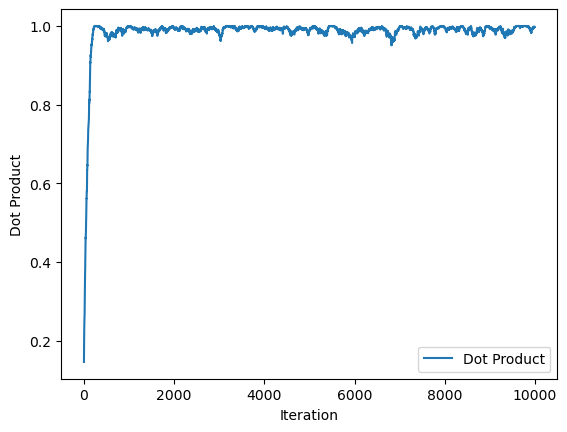

In [197]:
liste_theta_hat = stochastic_gradient_descent(X_noisy, y_noisy, max_iter = int(1e4))[1]
liste_dot_product = np.dot(liste_theta_hat, theta/norm_theta)
plt.plot(liste_dot_product)
plt.xlabel('Iteration')
plt.ylabel('Dot Product')
plt.legend(['Dot Product'])
print('The dot product between the true theta and the estimated theta is', liste_dot_product[-1])

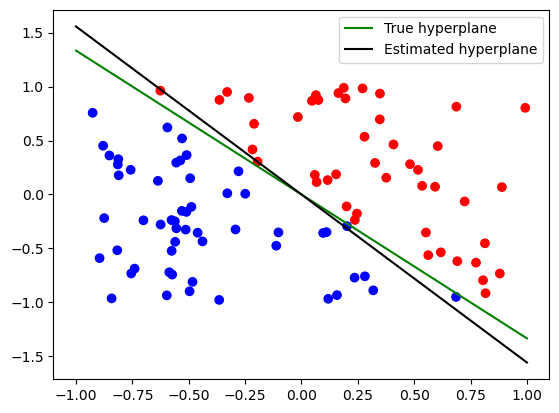

In [198]:
plt.scatter(samples[0][:, 0], samples[0][:, 1], color=colors)

# Plot the separation hyperplane
x = np.linspace(-1, 1, 100)
y = -(theta[0] * x) / theta[1]  # Assuming `theta` is the parameter vector of the hyperplane
z = -(liste_theta_hat[-1][0] * x) / liste_theta_hat[-1][1]
plt.plot(x, y, color='green', label='True hyperplane')
plt.plot(x, z, color='black', label='Estimated hyperplane')
plt.legend()

plt.show()

The dot product has practically not changed, so has the accuracy. Even with Gaussian noise, $\overline{w}$ and $w^*$ are close. The SGD approach seems to be robust to noise. 

## 5

In [199]:
!pip install ucimlrepo


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [260]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
#normalized data
X = (X - X.mean()) / X.std()

# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [261]:
y.replace('B', 1, inplace=True)
y.replace('M', -1, inplace=True)

/var/folders/8r/j32fdl9577757zwhgtdsbrpr0000gn/T/ipykernel_63673/4277320123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace('B', 1, inplace=True)
/var/folders/8r/j32fdl9577757zwhgtdsbrpr0000gn/T/ipykernel_63673/4277320123.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace('M', -1, inplace=True)
/var/folders/8r/j32fdl9577757zwhgtdsbrpr0000gn/T/ipykernel_63673/4277320123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [270]:
SGD = stochastic_gradient_descent(X.values, y.values, max_iter = int(1e4))
theta = SGD[0]

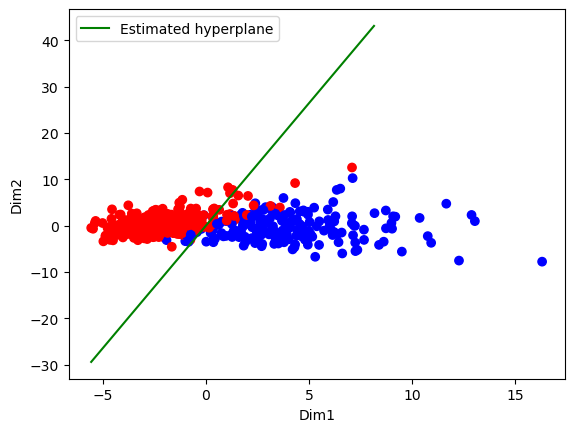

In [272]:
#perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#convert 'colors' array to 1-dimensional array of strings
colors = np.where(y == 1, 'red', 'blue').flatten()

#plot the data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)

plt.xlabel('Dim1')
plt.ylabel('Dim2')

# Plot the separation hyperplane
abscissa = np.linspace(np.min(X_pca[:, 0]), np.max(X_pca[:,0]/2), 100)
ordinates = -(theta[0] * abscissa) / theta[1]  # Assuming `theta` is the parameter vector of the hyperplane
plt.plot(abscissa, ordinates, color='green', label='Estimated hyperplane')
plt.legend()

plt.show()